<a href="https://colab.research.google.com/github/pedro162/computer_vision/blob/main/face_detection_with_traditoinal_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install opencv-contrib-python==4.10.0.84 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.12.0.88
    Uninstalling opencv-contrib-python-4.12.0.88:
      Successfully uninstalled opencv-contrib-python-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.3 which is incompati

In [1]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

In [2]:
cv2.__version__

'4.10.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
print(os.listdir('/content/drive/MyDrive/yalefaces/train'))

['subject01.glasses.gif', 'subject01.noglasses.gif', 'subject01.leftlight.gif', 'subject01.normal.gif', 'subject01.rightlight.gif', 'subject01.sad.gif', 'subject01.surprised.gif', 'subject01.sleepy.gif', 'subject01.wink.gif', 'subject02.glasses.gif', 'subject02.happy.gif', 'subject02.noglasses.gif', 'subject02.normal.gif', 'subject02.rightlight.gif', 'subject02.sleepy.gif', 'subject02.sad.gif', 'subject02.surprised.gif', 'subject02.wink.gif', 'subject03.centerlight.gif', 'subject03.happy.gif', 'subject03.normal.gif', 'subject03.noglasses.gif', 'subject03.rightlight.gif', 'subject03.sleepy.gif', 'subject03.sad.gif', 'subject03.wink.gif', 'subject03.surprised.gif', 'subject04.centerlight.gif', 'subject04.happy.gif', 'subject04.glasses.gif', 'subject04.noglasses.gif', 'subject04.normal.gif', 'subject04.rightlight.gif', 'subject04.sleepy.gif', 'subject04.wink.gif', 'subject05.centerlight.gif', 'subject05.glasses.gif', 'subject05.happy.gif', 'subject05.leftlight.gif', 'subject05.noglasses.g

In [5]:
test_image = '/content/drive/MyDrive/yalefaces/train/subject01.leftlight.gif'
image = Image.open(test_image).convert('L')
type(image)

PIL.Image.Image

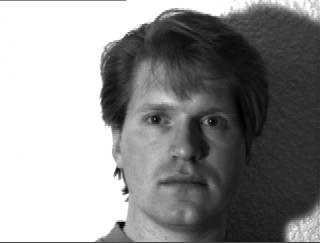

In [6]:
image

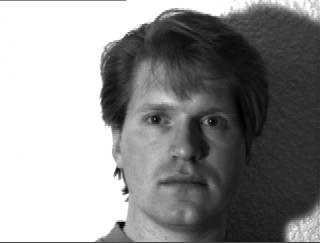

(243, 320)


In [7]:
np_image = np.array(image, 'uint8')
cv2_imshow(np_image)
print(np_image.shape)

In [8]:
243*320

77760

In [9]:
proto = '/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/deploy.prototxt.txt'
model = '/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/res10_300x300_ssd_iter_140000.caffemodel';

network = cv2.dnn.readNetFromCaffe(proto, model)

In [10]:
image = cv2.cvtColor(np_image, cv2.COLOR_GRAY2BGR)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (100, 100)), 1.0, (100, 100), (104.0, 117.0, 123.0))
network.setInput(blob)
detections = network.forward()

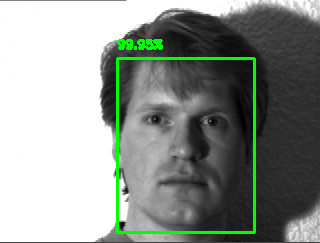

(243, 320, 3)


In [11]:
min_confi = 0.7
copied_image = image.copy()

for i in range(0, detections.shape[2]):
  confidance = detections[0, 0, i, 2]
  if confidance > min_confi:
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (start_x, start_y, end_x, end_y) = box.astype('int')
    roi = copied_image[start_y:end_y, start_x:end_x]
    text = '{:.2f}%'.format(confidance * 100)
    cv2.putText(image, text, (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)
    cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0,255,0), 2)

face = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
print(image.shape)

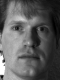

(80, 60)


In [12]:
face = cv2.resize(face, (60, 80))
cv2_imshow(face)
print(face.shape)

In [13]:
def face_detection(network, image_path, min_confi=0.7):
  image = Image.open(image_path).convert('L')
  image = np.array(image, 'uint8')
  image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
  (h, w) = image.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (100, 100)), 1.0, (100, 100), (104.0, 117.0, 123.0))
  network.setInput(blob)
  detections = network.forward()

  face = None
  for i in range(0, detections.shape[2]):
    confidance = detections[0, 0, i, 2]
    if confidance > min_confi:
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (start_x, start_y, end_x, end_y) = box.astype('int')
      roi = image[start_y:end_y, start_x:end_x]
      roi = cv2.resize(roi, (60, 80))
      cv2.putText(image, text, (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)
      cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0,255,0), 2)
      face = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

  return face, image



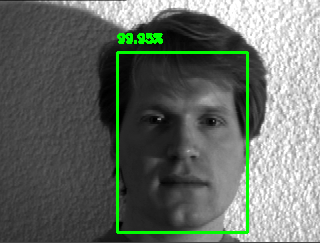

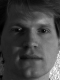

In [14]:
test_image = '/content/drive/MyDrive/yalefaces/train/subject01.rightlight.gif'
face, image = face_detection(network, test_image)
cv2_imshow(image)
cv2_imshow(face)

In [15]:
def get_image_data():
  dir = '/content/drive/MyDrive/yalefaces/train'
  paths = [os.path.join('/content/drive/MyDrive/yalefaces/train', f) for f in os.listdir(dir)]
  faces = []
  ids = []

  for path in paths:
    face, image = face_detection(network, path)
    #cv2_imshow(image)
    #cv2_imshow(face)
    #print(path)
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    faces.append(face)
    ids.append(id)
    cv2_imshow(face)
  return np.array(ids), faces

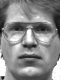

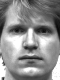

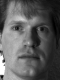

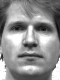

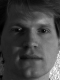

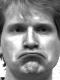

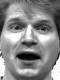

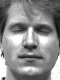

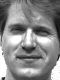

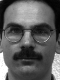

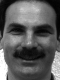

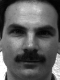

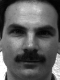

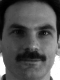

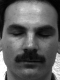

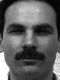

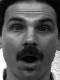

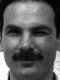

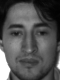

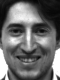

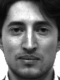

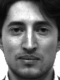

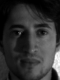

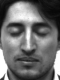

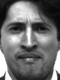

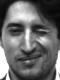

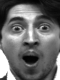

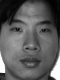

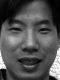

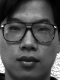

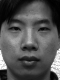

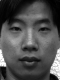

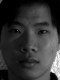

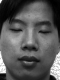

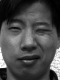

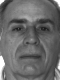

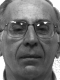

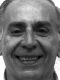

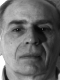

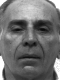

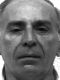

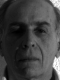

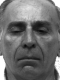

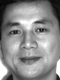

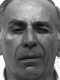

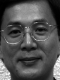

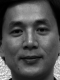

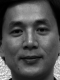

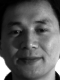

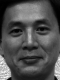

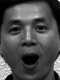

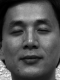

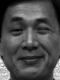

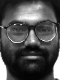

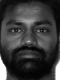

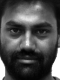

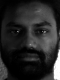

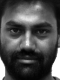

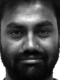

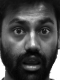

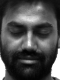

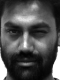

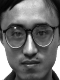

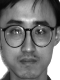

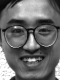

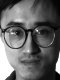

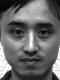

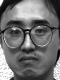

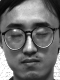

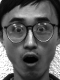

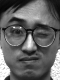

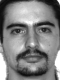

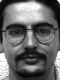

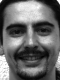

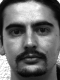

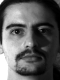

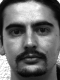

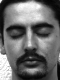

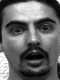

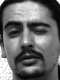

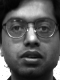

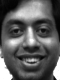

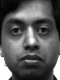

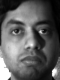

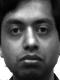

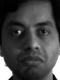

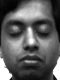

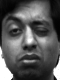

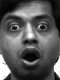

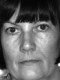

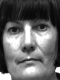

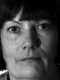

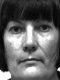

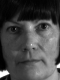

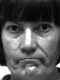

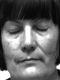

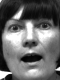

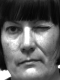

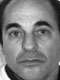

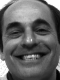

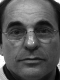

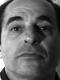

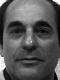

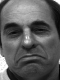

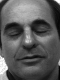

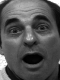

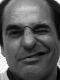

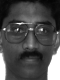

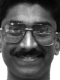

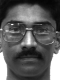

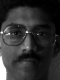

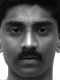

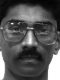

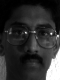

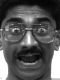

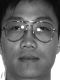

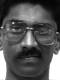

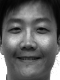

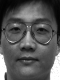

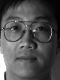

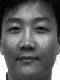

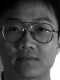

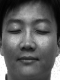

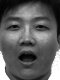

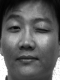

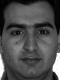

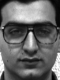

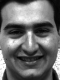

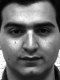

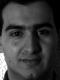

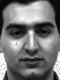

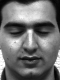

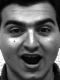

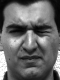

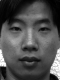

In [16]:
ids, faces = get_image_data()

In [17]:
ids

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,  4])

In [18]:
len(ids)

135

In [19]:
len(faces)

135

In [20]:
ids[0]

np.int64(1)

array([[118, 116, 108, ...,  81,  76,  70],
       [110, 127, 110, ...,  76,  83,  88],
       [ 92, 112, 100, ...,  84,  92,  88],
       ...,
       [156,  60,  29, ..., 255, 255, 255],
       [166,  96,  24, ..., 255, 255, 248],
       [164, 143,  68, ..., 255, 255, 244]], shape=(80, 60), dtype=uint8)
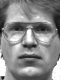

In [21]:
faces[0]

In [22]:
path_eigen_classifier = '/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/eigen_classifier.yml'

In [23]:
eigen_classifier = cv2.face.EigenFaceRecognizer_create()
eigen_classifier.train(faces, ids)
eigen_classifier.write(path_eigen_classifier)

In [24]:
eigen_classifier = cv2.face.EigenFaceRecognizer_create()
eigen_classifier.read(path_eigen_classifier)

In [25]:
test_image = '//content/drive/MyDrive/yalefaces/test/subject03.glasses.gif'


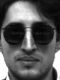

In [26]:
face, image = face_detection(network, test_image)
cv2_imshow(face)

In [27]:
predict = eigen_classifier.predict(face)
predict

(3, 3280.0936836602177)

In [28]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

3

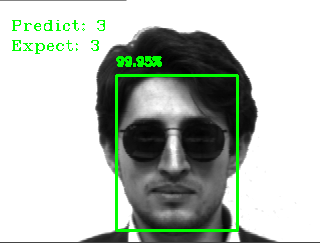

In [29]:
cv2.putText(image, 'Predict: '+str(predict[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))
cv2.putText(image, 'Expect: '+str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))
cv2_imshow(image)

In [30]:
def predict_image(image, classifier, show_conf=False):
  face, np_image = face_detection(network, image)
  predict, conf = classifier.predict(face)

  expected_output = int(os.path.split(image)[1].split('.')[0].replace('subject', ''))
  cv2.putText(np_image, 'Predict: '+str(predict), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))
  cv2.putText(np_image, 'Expect: '+str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))

  if show_conf:
    print(conf)

  return np_image, predict


1052.6593231145075


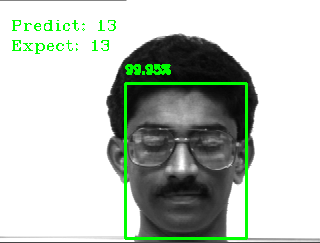

In [31]:
test_image = '/content/drive/MyDrive/yalefaces/test/subject13.sleepy.gif'
np_image, predict = predict_image(test_image, eigen_classifier, True)
cv2_imshow(np_image)


In [32]:
def evalueate_algorithm(paths, classifier):
  predicts = []
  expected_outputs = []

  for path in paths:
    face, image = face_detection(network, path)
    predict, conf = classifier.predict(face)

    expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    predicts.append(predict)
    expected_outputs.append(expected_output)

  return np.array(predicts), np.array(expected_outputs)

In [33]:
test_paths = [os.path.join('/content/drive/MyDrive/yalefaces/test', f) for f in os.listdir('/content/drive/MyDrive/yalefaces/test')]
print(test_paths)

['/content/drive/MyDrive/yalefaces/test/subject01.gif', '/content/drive/MyDrive/yalefaces/test/subject01.happy.gif', '/content/drive/MyDrive/yalefaces/test/subject02.centerlight.gif', '/content/drive/MyDrive/yalefaces/test/subject02.leftlight.gif', '/content/drive/MyDrive/yalefaces/test/subject03.glasses.gif', '/content/drive/MyDrive/yalefaces/test/subject03.leftlight.gif', '/content/drive/MyDrive/yalefaces/test/subject04.leftlight.gif', '/content/drive/MyDrive/yalefaces/test/subject04.surprised.gif', '/content/drive/MyDrive/yalefaces/test/subject05.sleepy.gif', '/content/drive/MyDrive/yalefaces/test/subject05.surprised.gif', '/content/drive/MyDrive/yalefaces/test/subject06.happy.gif', '/content/drive/MyDrive/yalefaces/test/subject06.leftlight.gif', '/content/drive/MyDrive/yalefaces/test/subject07.happy.gif', '/content/drive/MyDrive/yalefaces/test/subject07.leftlight.gif', '/content/drive/MyDrive/yalefaces/test/subject08.normal.gif', '/content/drive/MyDrive/yalefaces/test/subject08.rig

In [34]:
predict, expected_output = evalueate_algorithm(test_paths, eigen_classifier)

In [35]:
predict

array([ 5,  1,  9,  9,  3, 15, 14,  4,  5,  5,  6,  8,  7, 13,  8,  2,  6,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14,  1, 15])

In [36]:
expected_output

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_output, predict)

0.6666666666666666

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_output, predict)
cm

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

<Axes: >

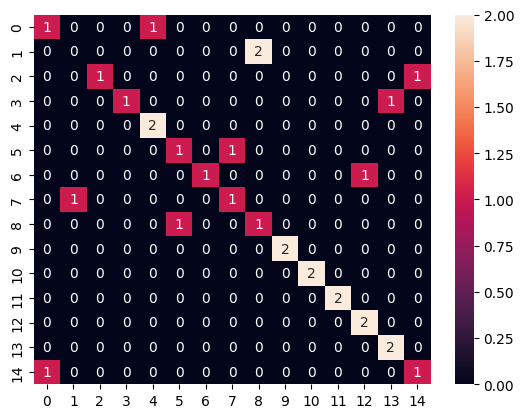

In [39]:
import seaborn
seaborn.heatmap(cm, annot=True)

788.9162657069231


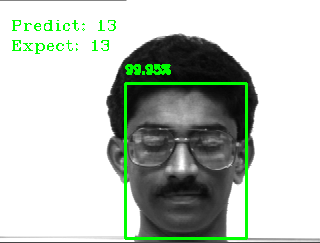

In [40]:
test_image = '/content/drive/MyDrive/yalefaces/test/subject13.sleepy.gif'
eigen_classifier_2 = cv2.face.EigenFaceRecognizer_create(40)
eigen_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, eigen_classifier_2, show_conf=True)
cv2_imshow(np_image)

556.4378358422308


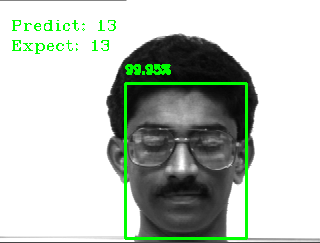

In [41]:
test_image = '/content/drive/MyDrive/yalefaces/test/subject13.sleepy.gif'
eigen_classifier_2 = cv2.face.EigenFaceRecognizer_create(20)
eigen_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, eigen_classifier_2, show_conf=True)
cv2_imshow(np_image)

1.7976931348623157e+308


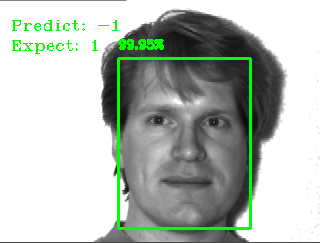

In [42]:
test_image = '/content/drive/MyDrive/yalefaces/test/subject01.gif'
eigen_classifier_2 = cv2.face.EigenFaceRecognizer_create(145, 2500)
eigen_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, eigen_classifier_2, show_conf=True)
cv2_imshow(np_image)

In [43]:
def evaluateion_result(paths,classifier):
  predict, expected_output = evalueate_algorithm(paths, classifier)
  accuracy = accuracy_score(expected_output, predict)
  print(accuracy)
  cm = confusion_matrix(expected_output, predict)
  seaborn.heatmap(cm, annot=True)

0.6


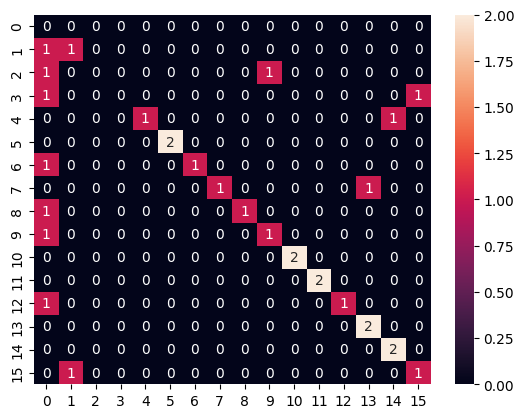

In [44]:
evaluateion_result(test_paths, eigen_classifier_2)

##Fisherfaces

In [45]:
fisher_classifier = cv2.face.FisherFaceRecognizer_create()
fisher_classifier.train(faces, ids)
fisher_classifier.write('/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/fisher_classifier.yml')

In [47]:
fisher_classifier = cv2.face.FisherFaceRecognizer_create()
fisher_classifier.read('/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/fisher_classifier.yml')

1273.3580692726152


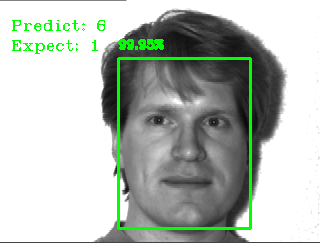

In [48]:
test_image = '/content/drive/MyDrive/yalefaces/test/subject01.gif'
np_image, predict = predict_image(test_image, fisher_classifier, True)
cv2_imshow(np_image)

In [49]:
evalueate_algorithm(test_paths, fisher_classifier)

(array([ 6,  1,  1,  9,  3, 13, 11,  4,  5,  5,  6, 10,  7, 13,  8,  8,  2,
         9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14,  2, 15]),
 array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
         9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]))

120.61830031193168


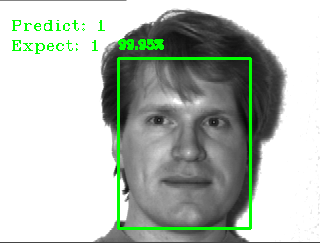

In [50]:
fisher_classifier_2 = cv2.face.FisherFaceRecognizer_create(5)
fisher_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, fisher_classifier_2, True)
cv2_imshow(np_image)

1.7976931348623157e+308


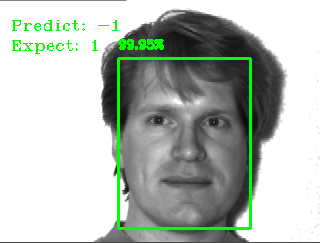

In [51]:
fisher_classifier_2 = cv2.face.FisherFaceRecognizer_create(20, 1000)
fisher_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, fisher_classifier_2, True)
cv2_imshow(np_image)

0.6666666666666666


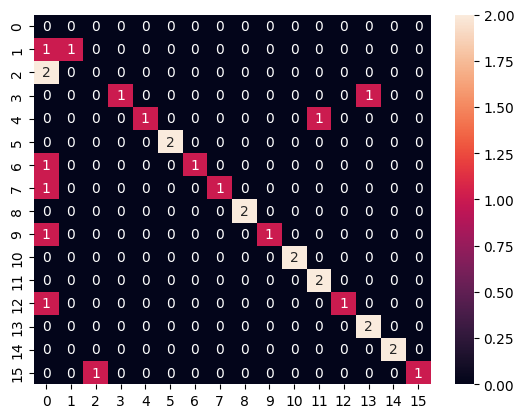

In [52]:
evaluateion_result(test_paths, fisher_classifier_2)
#

#LBPH

In [53]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/lbph_classifier.yml')

In [54]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.read('/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/lbph_classifier.yml')


106.54436393093243


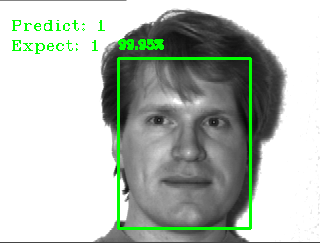

In [55]:
test_image = '/content/drive/MyDrive/yalefaces/test/subject01.gif'
np_image, predict = predict_image(test_image, lbph_classifier, True)
cv2_imshow(np_image)

In [56]:
evalueate_algorithm(test_paths, lbph_classifier)

(array([ 1,  1,  2,  9,  3,  3,  4,  4,  5,  5,  6,  3,  7,  7,  8, 14,  2,
         9, 10, 10, 11, 11, 12,  2, 13, 13, 14, 14,  6, 15]),
 array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
         9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]))

#radius

143.5327387577211


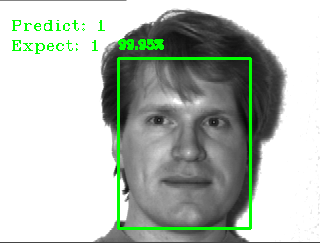

In [57]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius=4)
lbph_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, lbph_classifier_2, True)
cv2_imshow(np_image)

0.8333333333333334


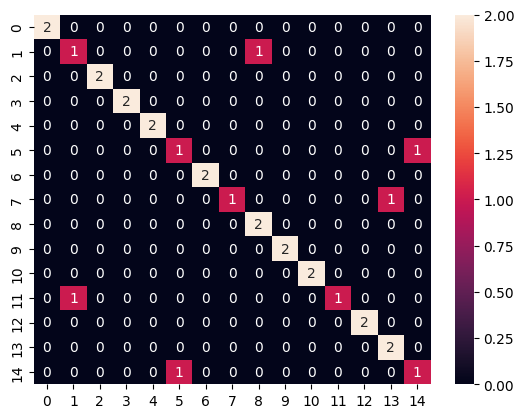

In [59]:
evaluateion_result(test_paths, lbph_classifier_2)

#Neighbors

178.2942236606237


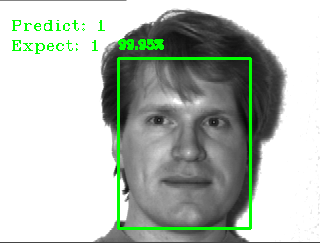

In [60]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=12)
lbph_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, lbph_classifier_2, True)
cv2_imshow(np_image)

0.8


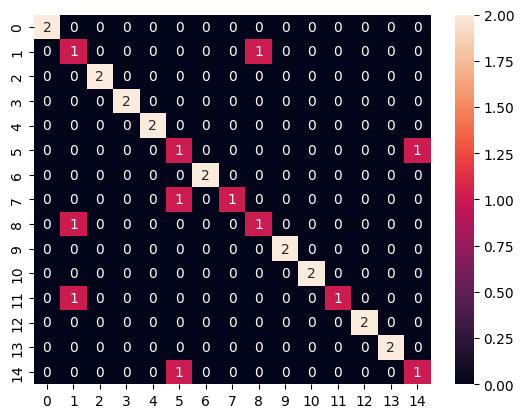

In [61]:
evaluateion_result(test_paths, lbph_classifier_2)

#grid_x and grid_y

636.8123562325495


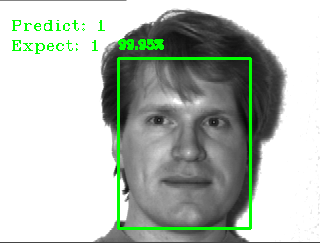

In [62]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=12, grid_x=14, grid_y=14)
lbph_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, lbph_classifier_2, True)
cv2_imshow(np_image)

0.8333333333333334


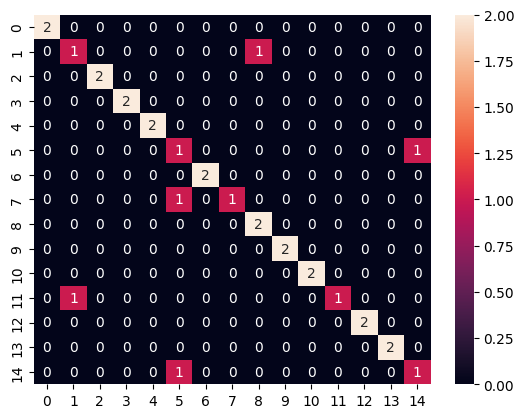

In [63]:
evaluateion_result(test_paths, lbph_classifier_2)

#threshold

1.7976931348623157e+308


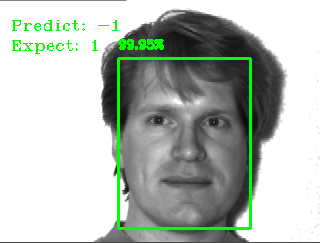

In [64]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=12, grid_x=14, grid_y=14, threshold=550)
lbph_classifier_2.train(faces, ids)
np_image, predict = predict_image(test_image, lbph_classifier_2, True)
cv2_imshow(np_image)

0.6666666666666666


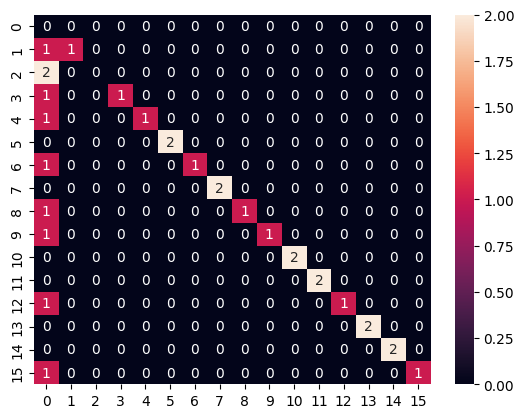

In [65]:
evaluateion_result(test_paths, lbph_classifier_2)